In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('ovmarkets-3dd85aa5a711.json', scope)

gc = gspread.authorize(credentials)

wks = gc.open("Indicator matching").get_worksheet(0)
dataframe = pd.DataFrame(wks.get_all_records())

In [2]:
dataframe_trim = dataframe.iloc[0:-650, 1:]#.tail(5)

In [3]:
dataframe_trim_bin = dataframe_trim.applymap(lambda x: 1 if x != '' else np.nan)
dataframe_trim_bin.loc[:, 'Category'] = dataframe_trim.loc[:, 'Category']
dataframe_trim_bin.loc[:, 'Abstract Indicator Name'] = dataframe_trim.loc[:, 'Abstract Indicator Name']

In [4]:
dataframe_trim_bin_inx = dataframe_trim_bin.copy()
dataframe_trim_bin_inx = dataframe_trim_bin_inx.set_index(['Category', 'Abstract Indicator Name'])

In [5]:
dataframe_map = dataframe_trim_bin.groupby(['Category', 'Abstract Indicator Name']).sum()

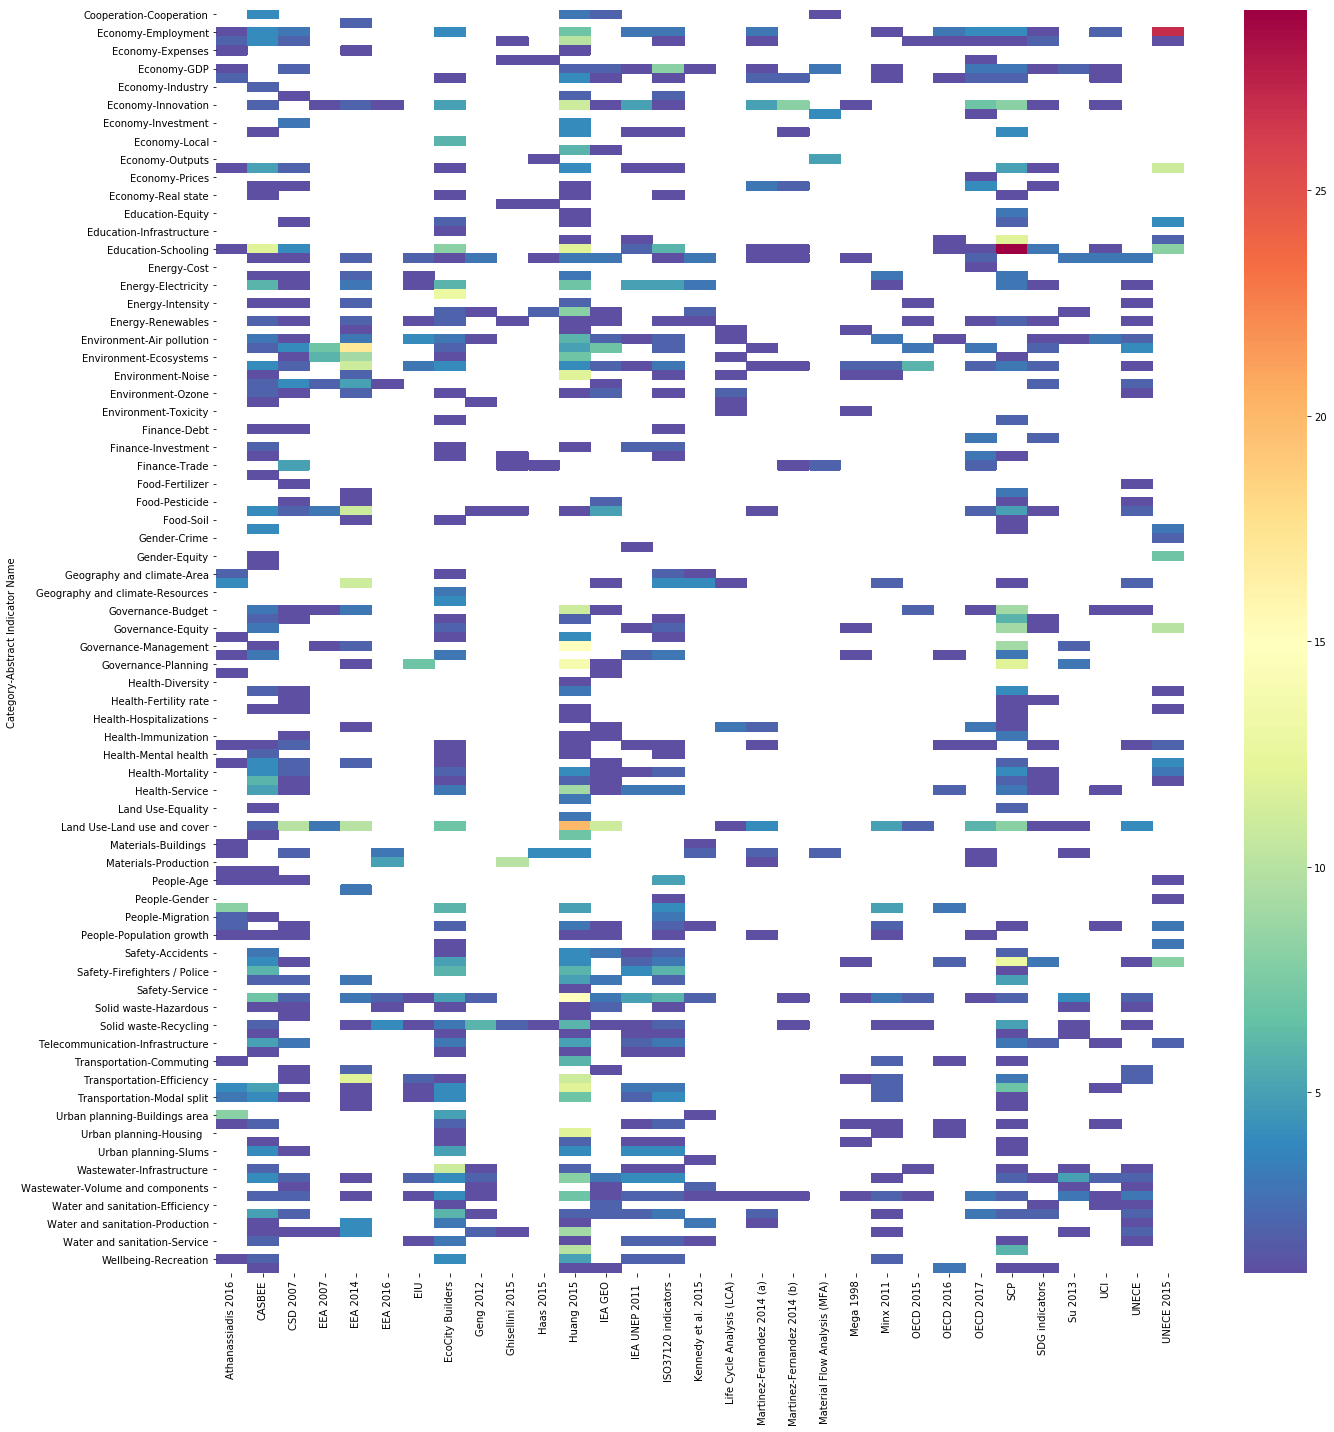

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dataframe_map, annot=False, ax=ax, cmap='Spectral_r', square=False)#, vmin=1, vmax=10)
fig.tight_layout()
plt.savefig("heatmap.png", dpi=300)

In [7]:
dataframe_map_cat = dataframe_trim_bin.groupby(['Category']).sum()

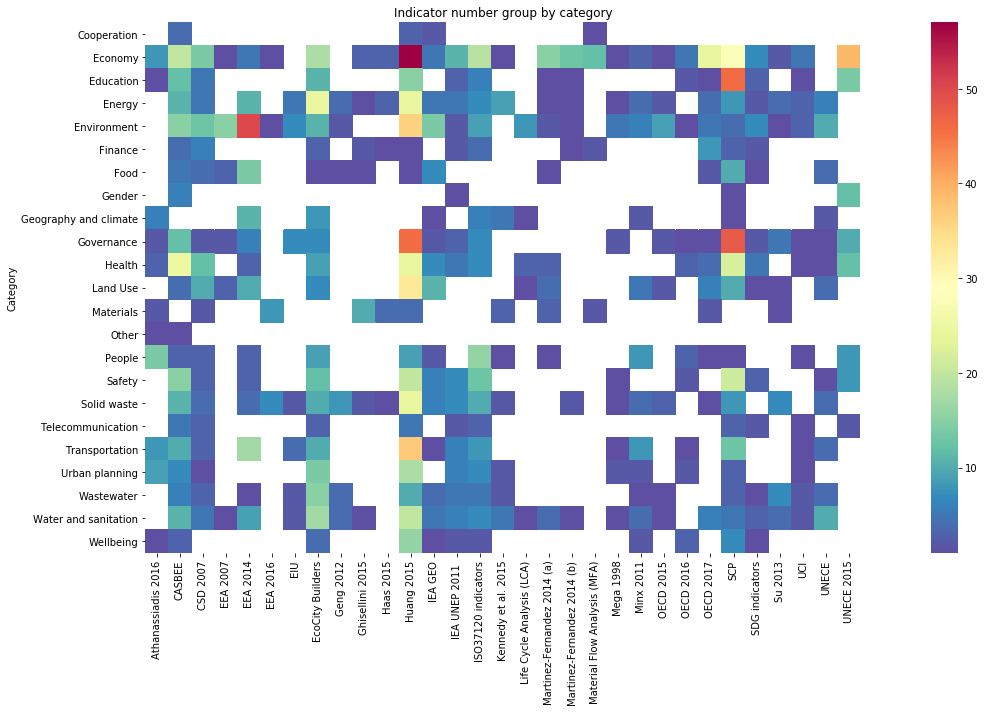

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataframe_map_cat, annot=False, ax=ax, cmap='Spectral_r', square=True)#, vmin=1, vmax=10)
ax.set_title("Indicator number group by category")
fig.tight_layout()
plt.savefig("heatmap_cat.png", dpi=300)

In [11]:
from os import path
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = os.getcwd()
c_mask = np.array(Image.open(path.join(d, "circular2.png")))

stopwords = set(STOPWORDS)
stopwords.add("per")
stopwords.add("mean")
stopwords.add("data")
stopwords.add("rate")
stopwords.add("total")
stopwords.add("percentage")
stopwords.add("average")
stopwords.add("number")
stopwords.add("row")

wc = WordCloud(background_color="white", max_words=2000, mask=c_mask,
               stopwords=stopwords)

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


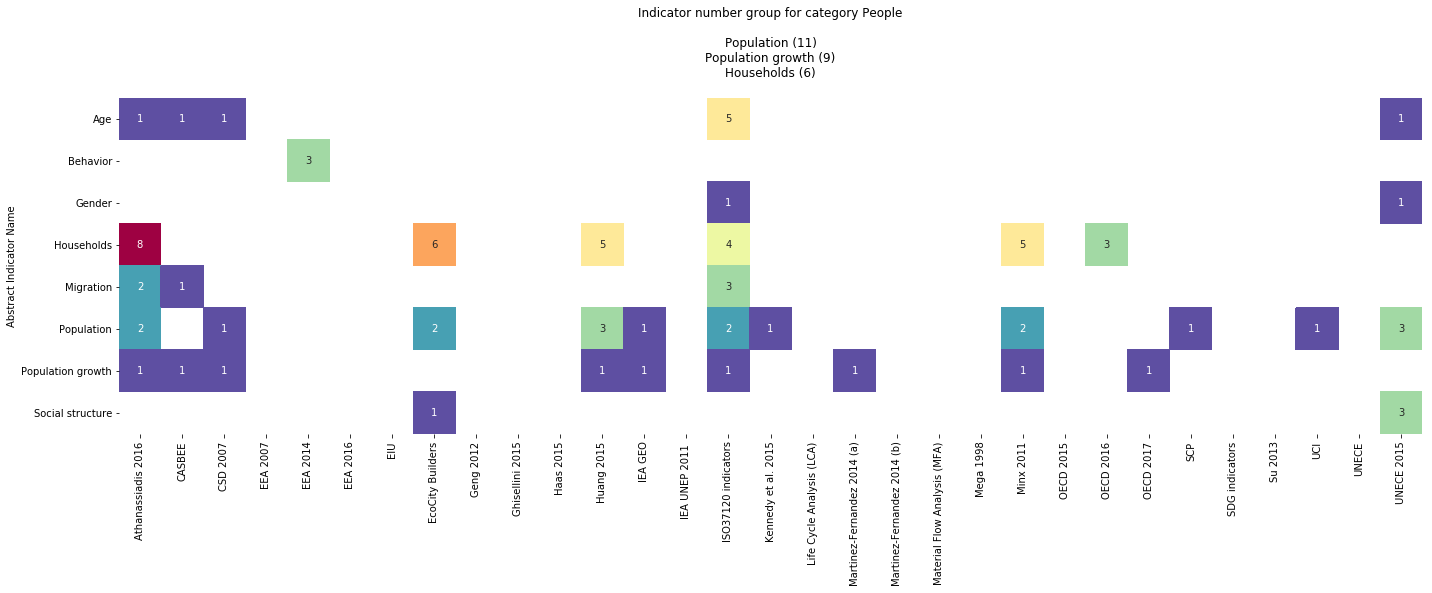

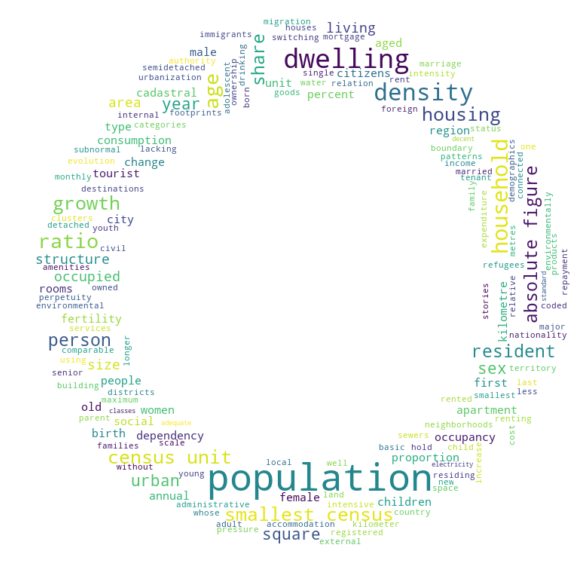

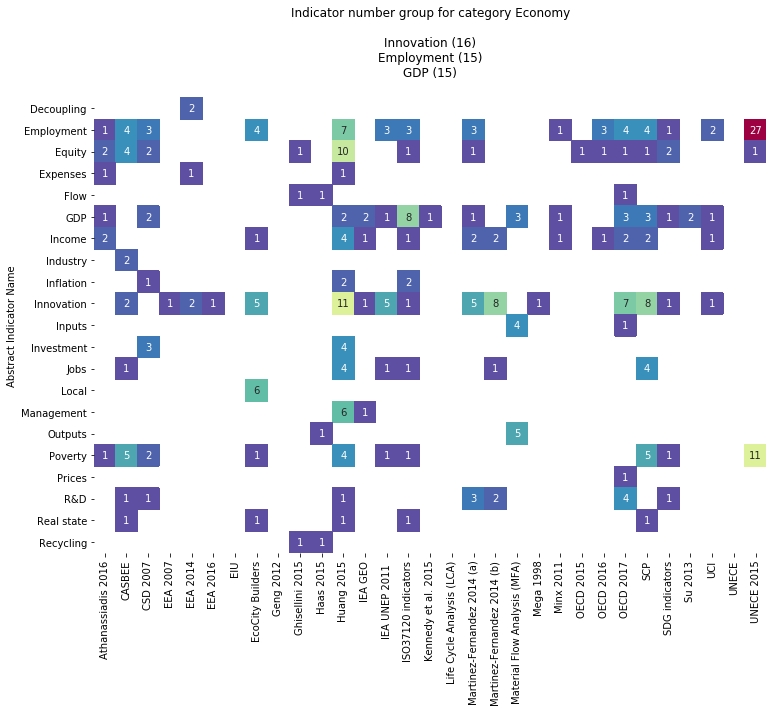

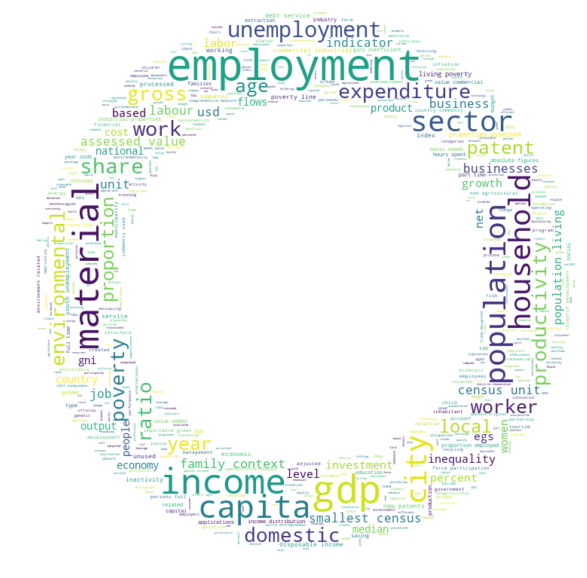

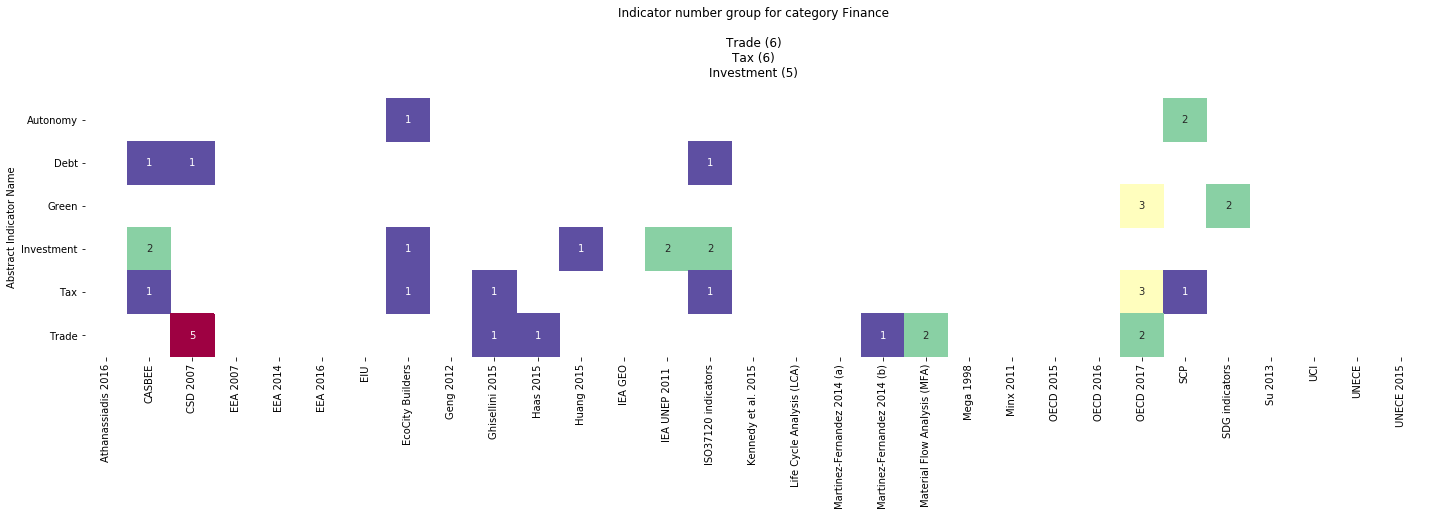

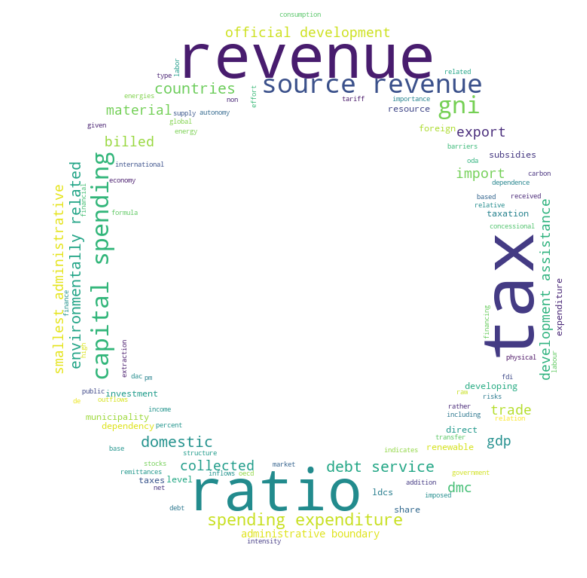

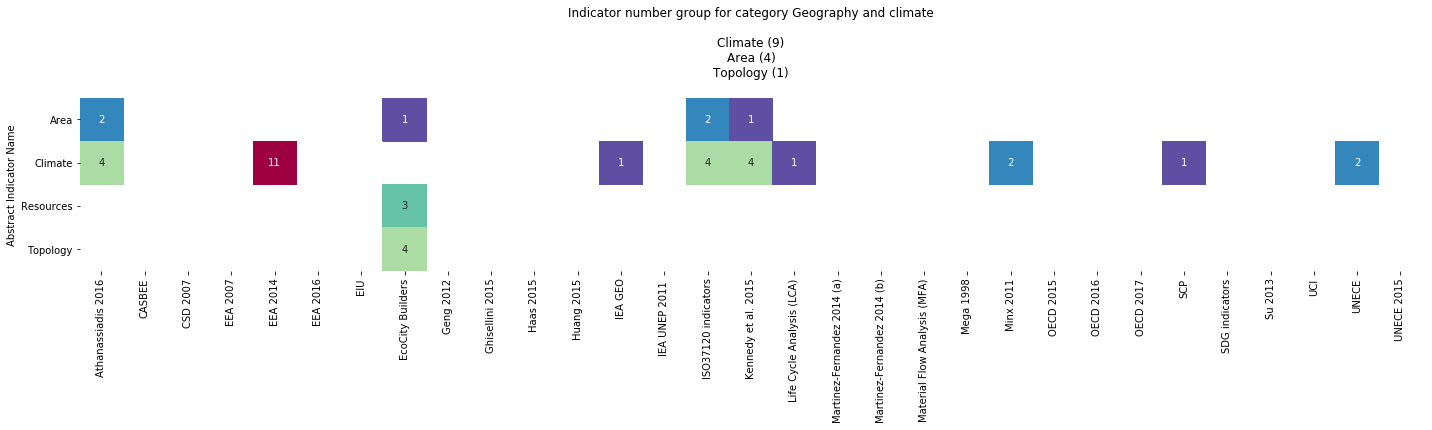

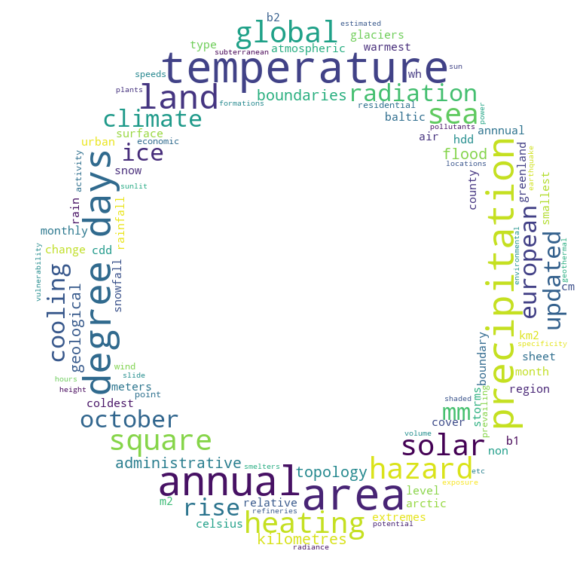

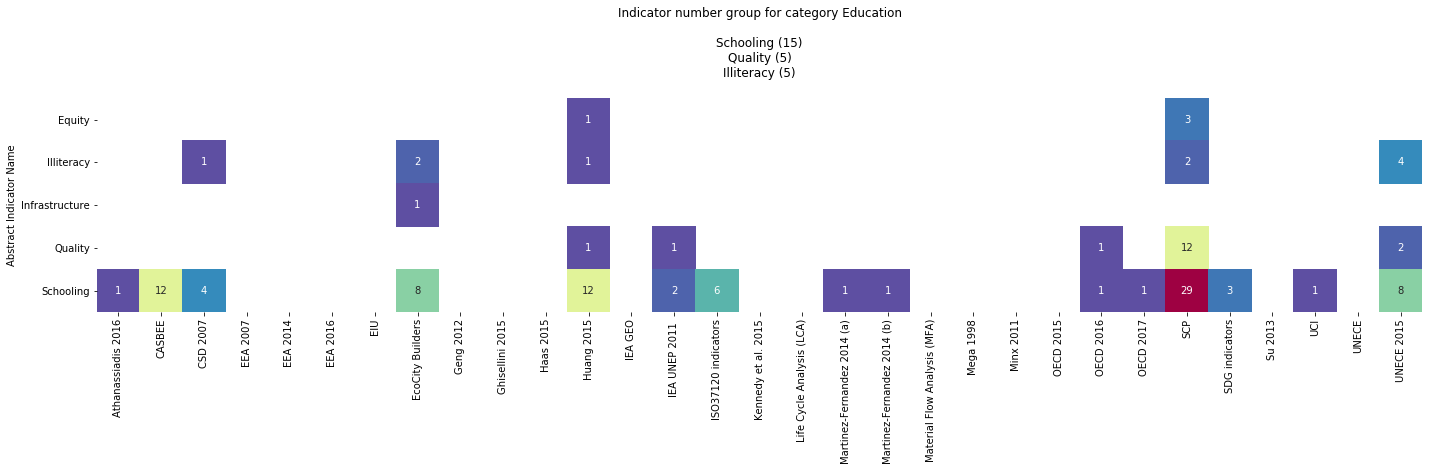

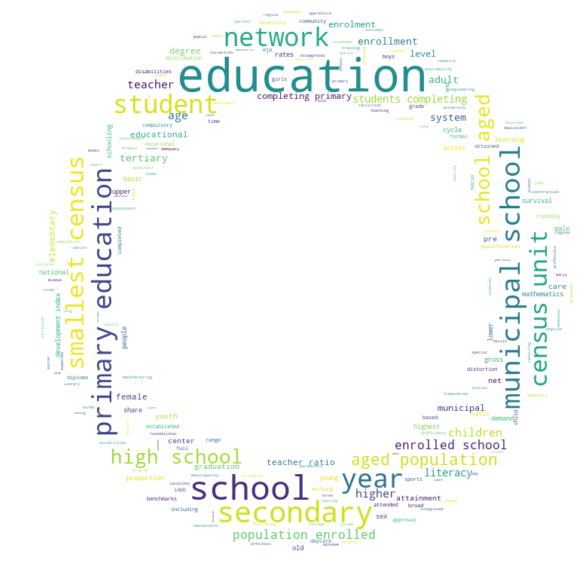

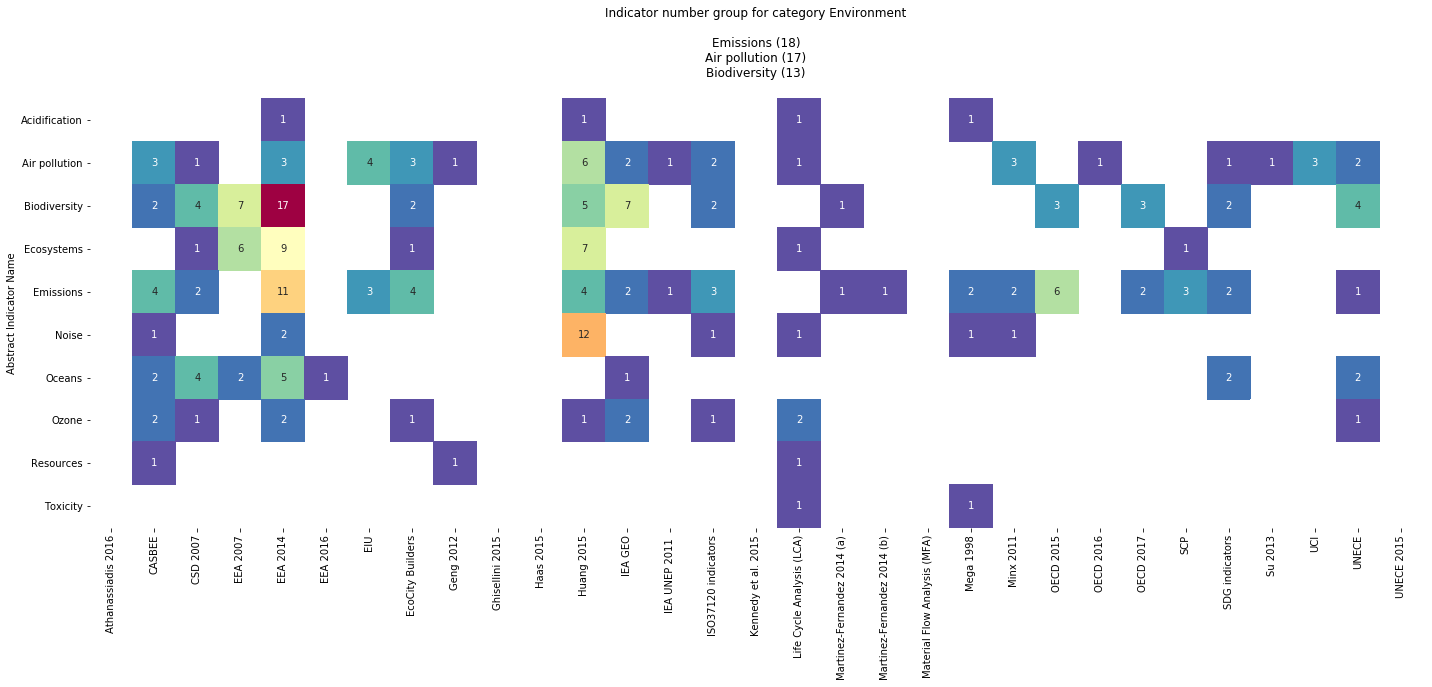

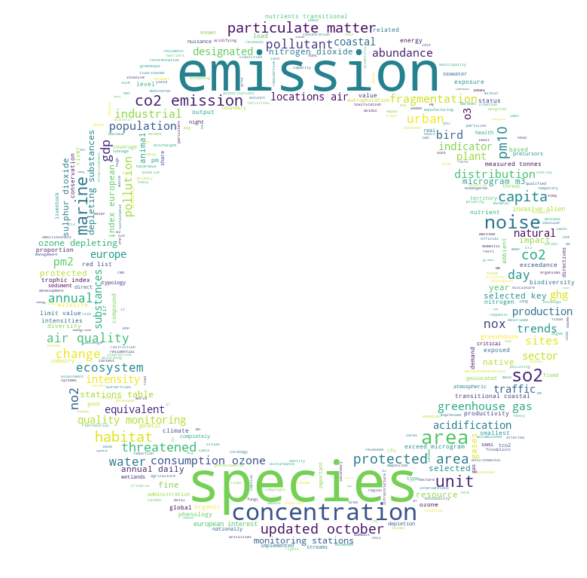

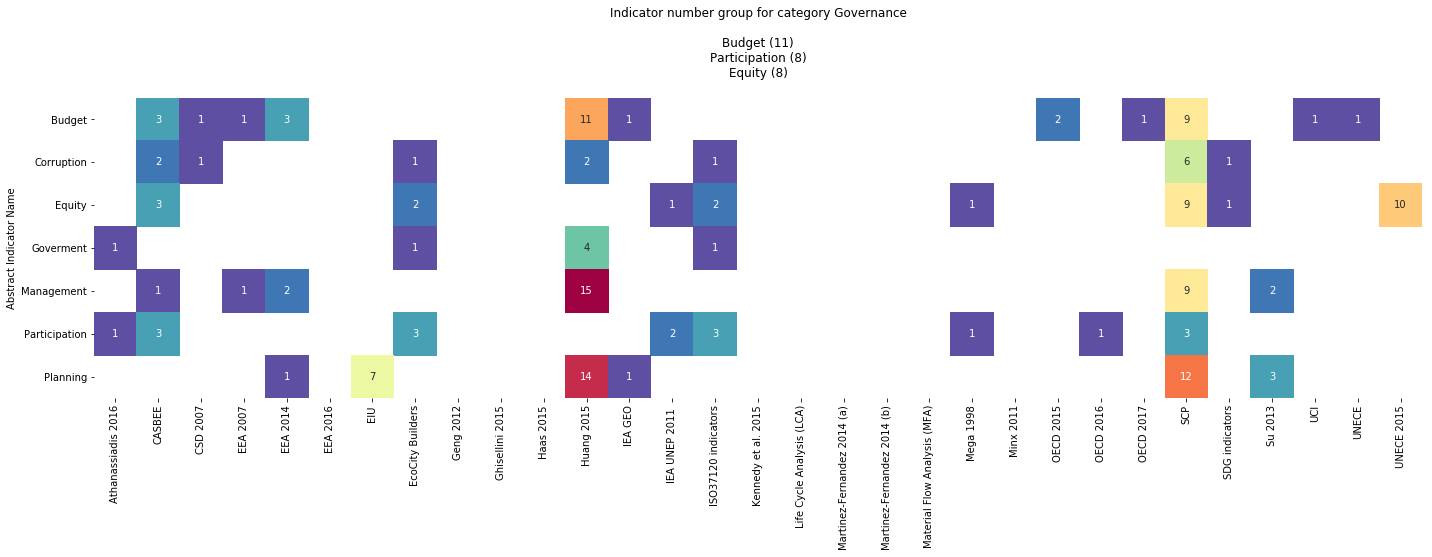

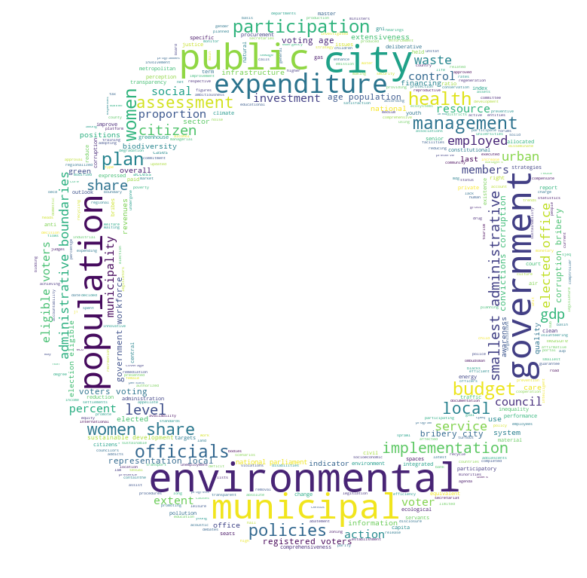

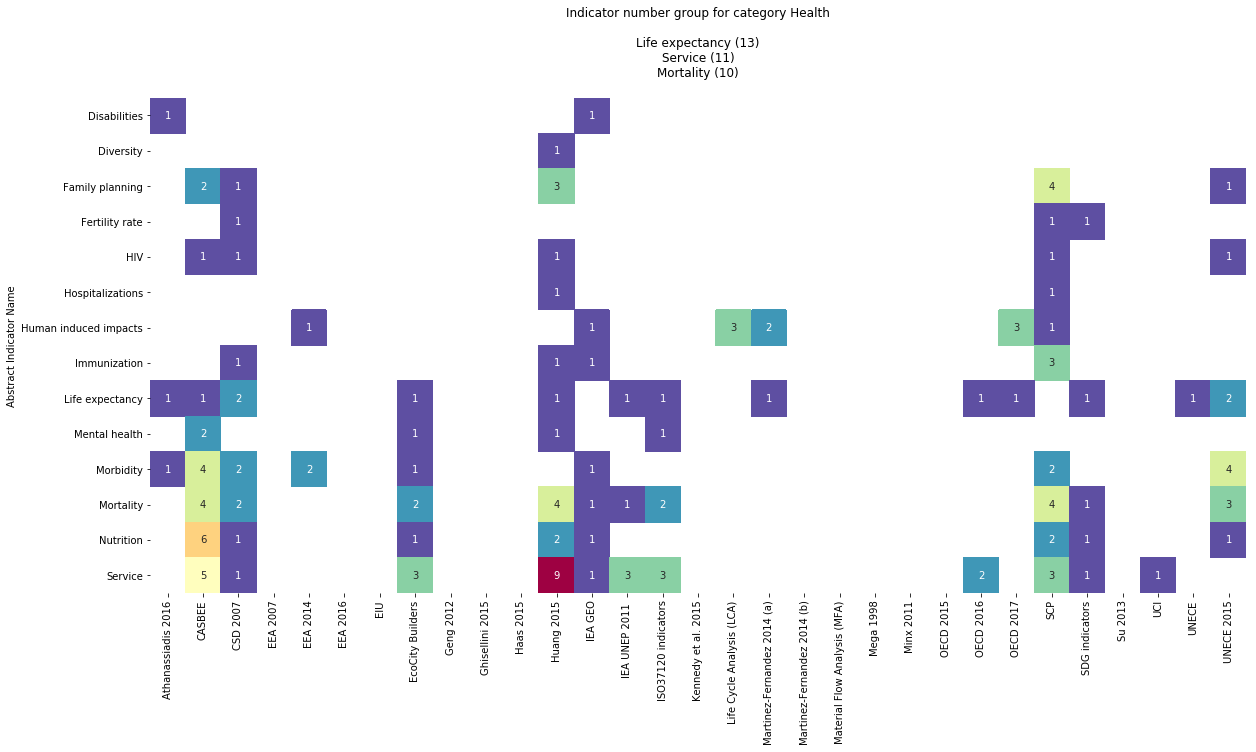

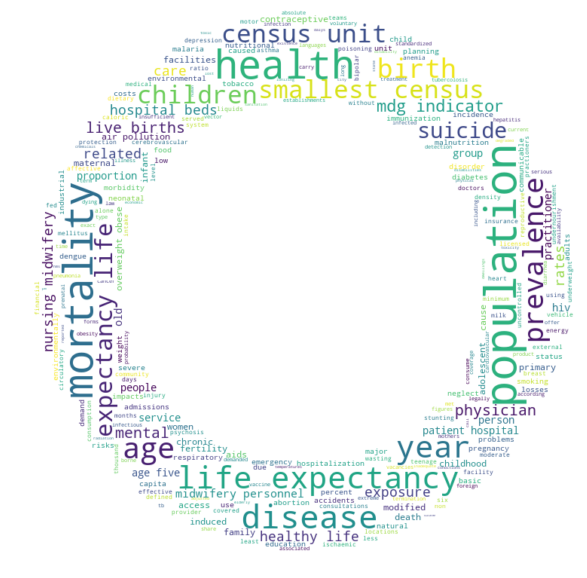

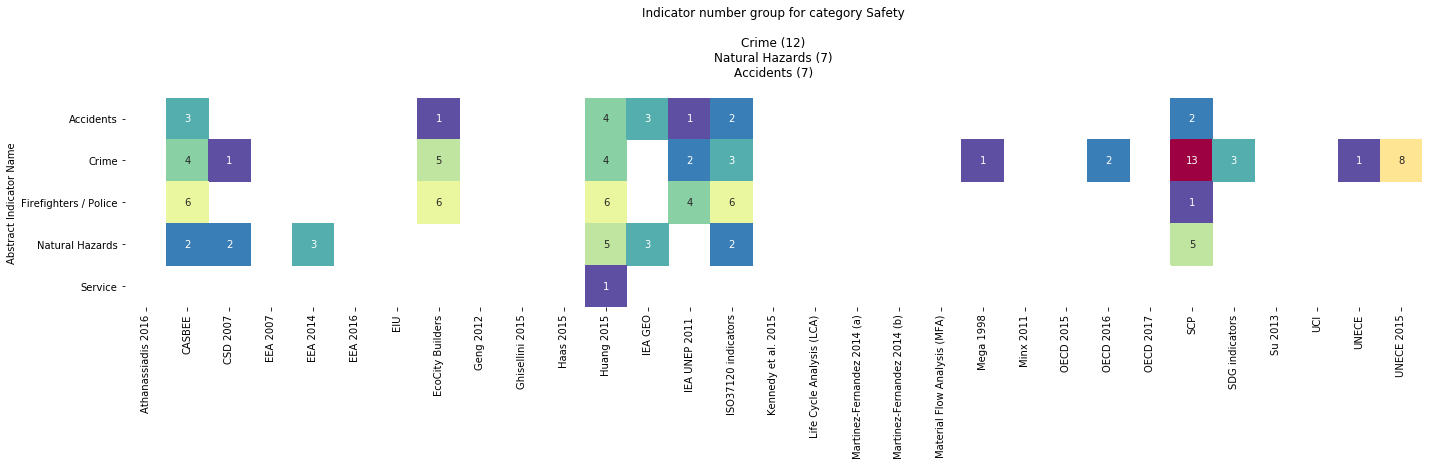

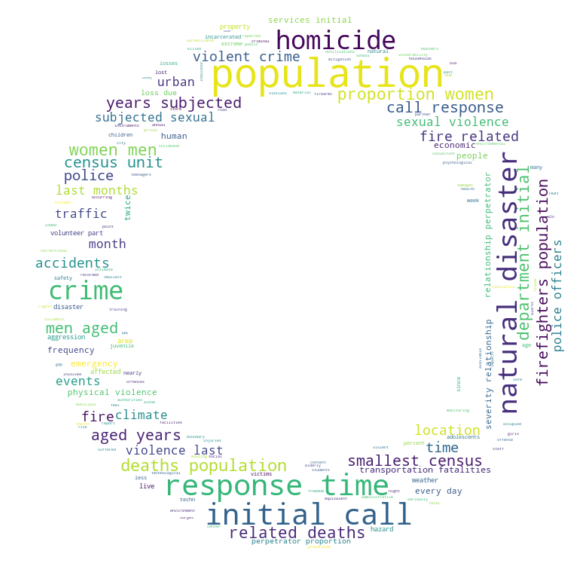

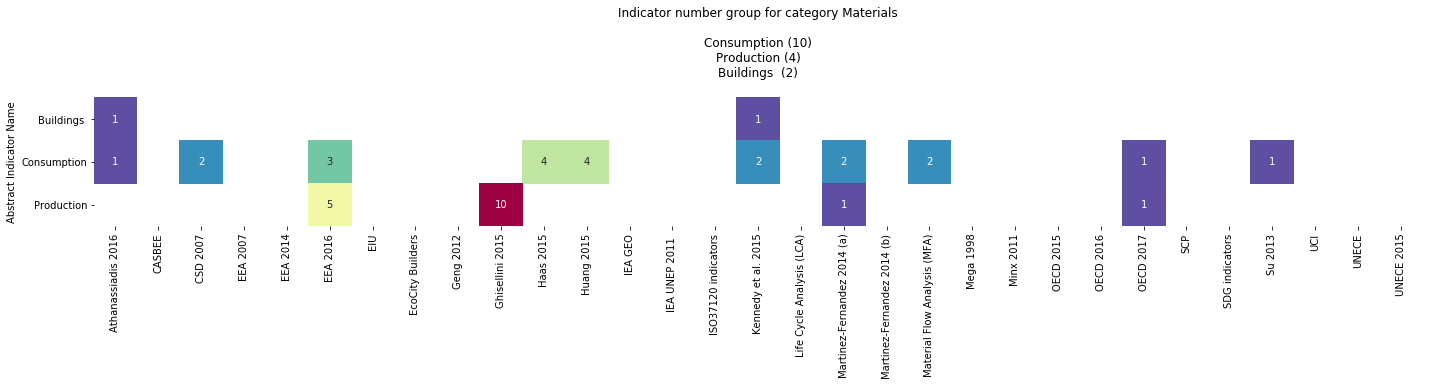

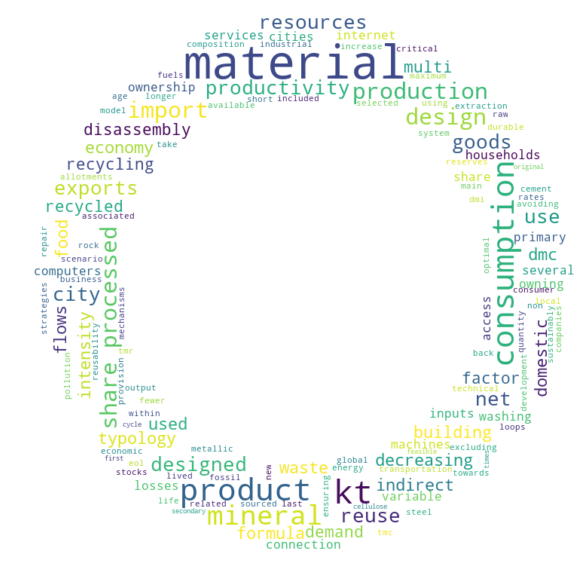

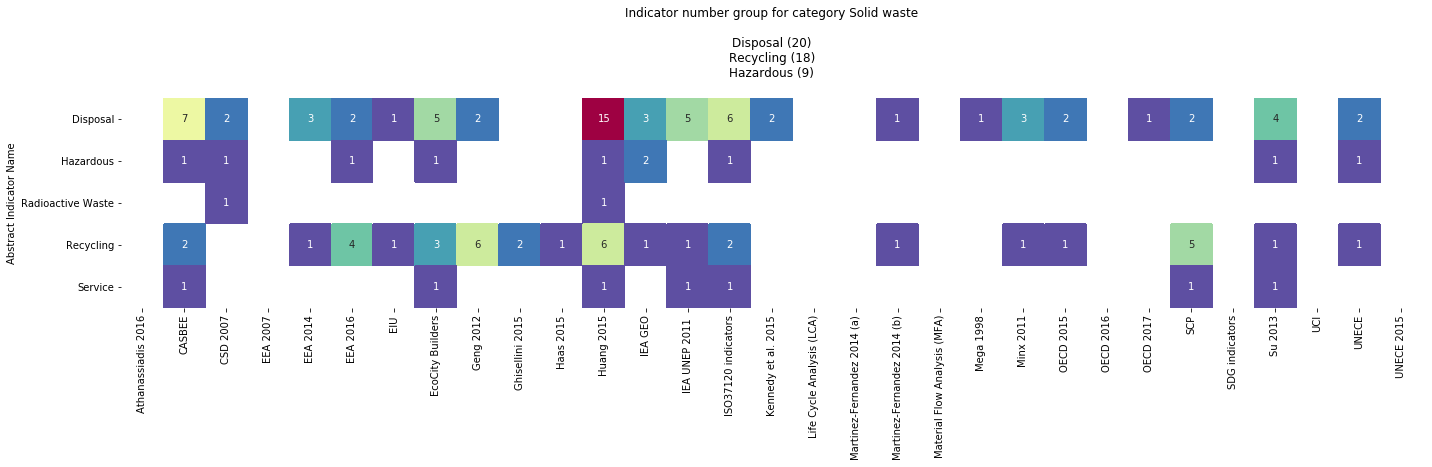

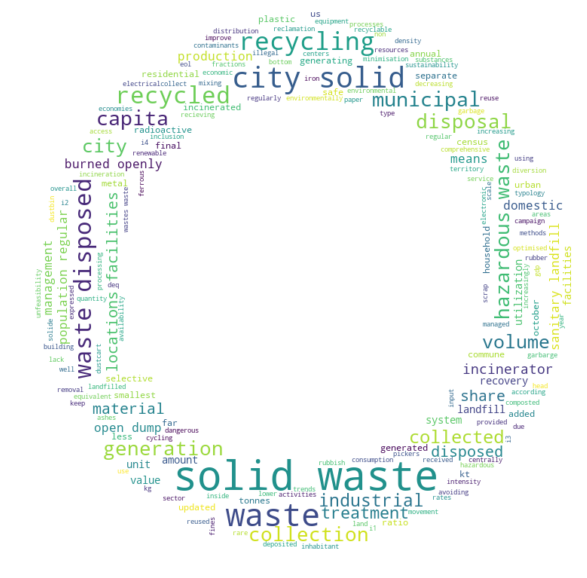

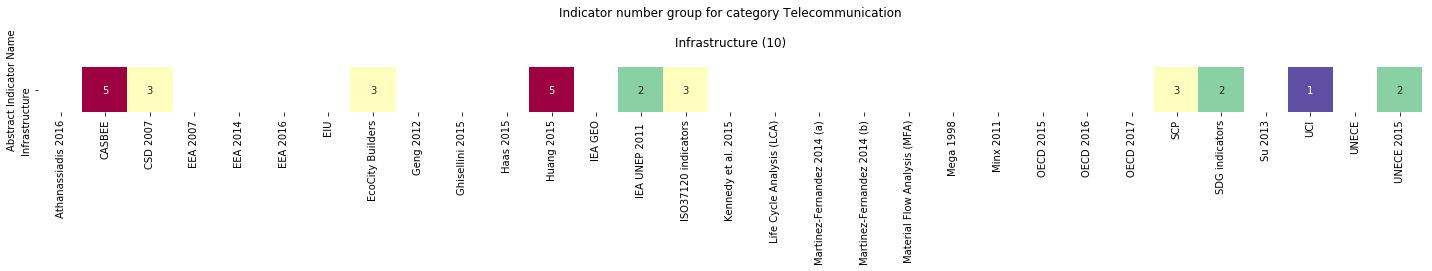

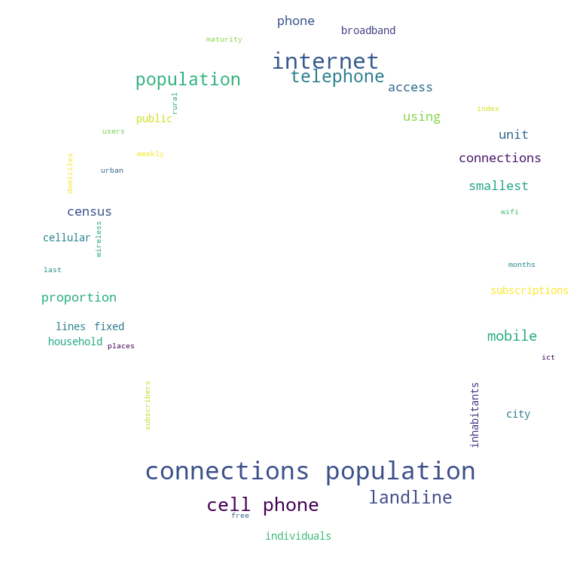

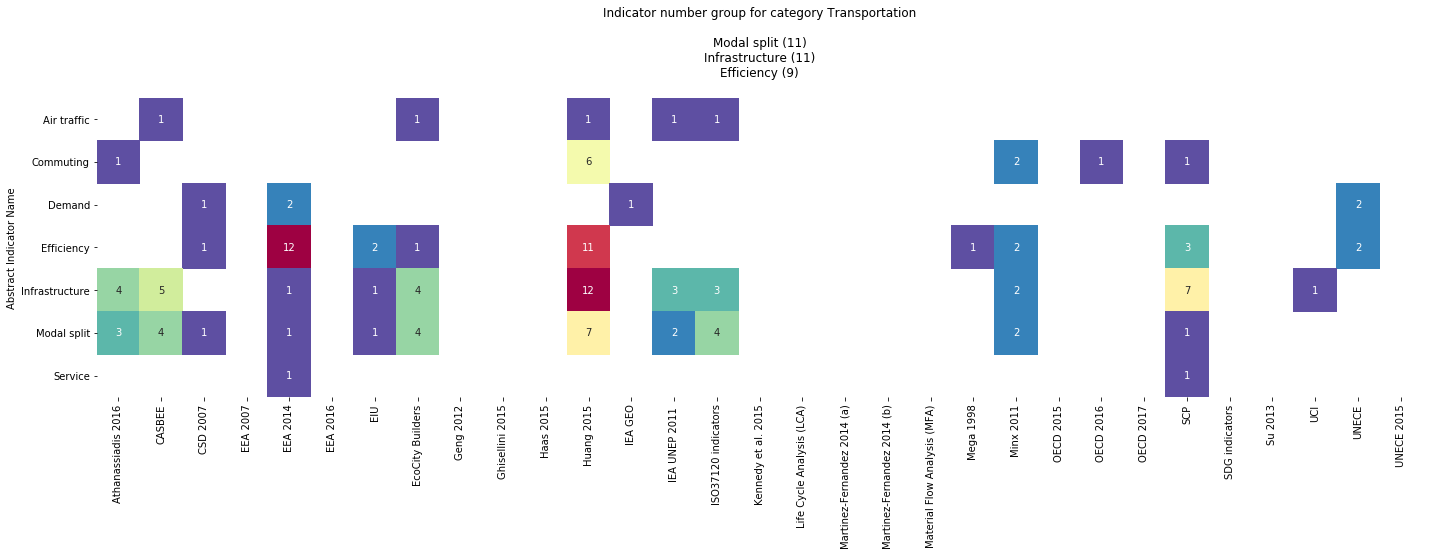

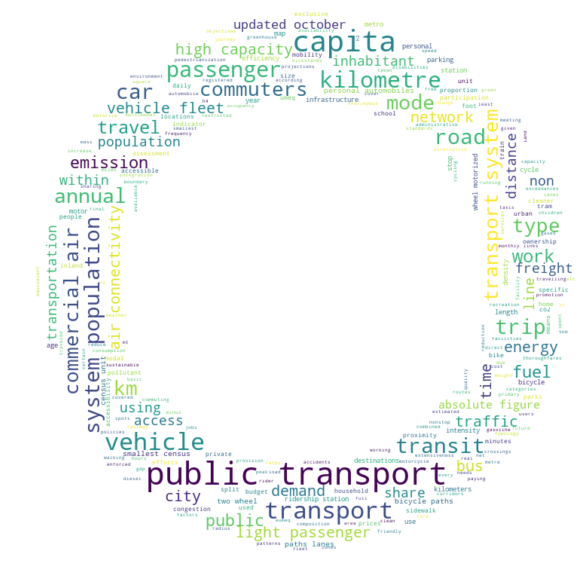

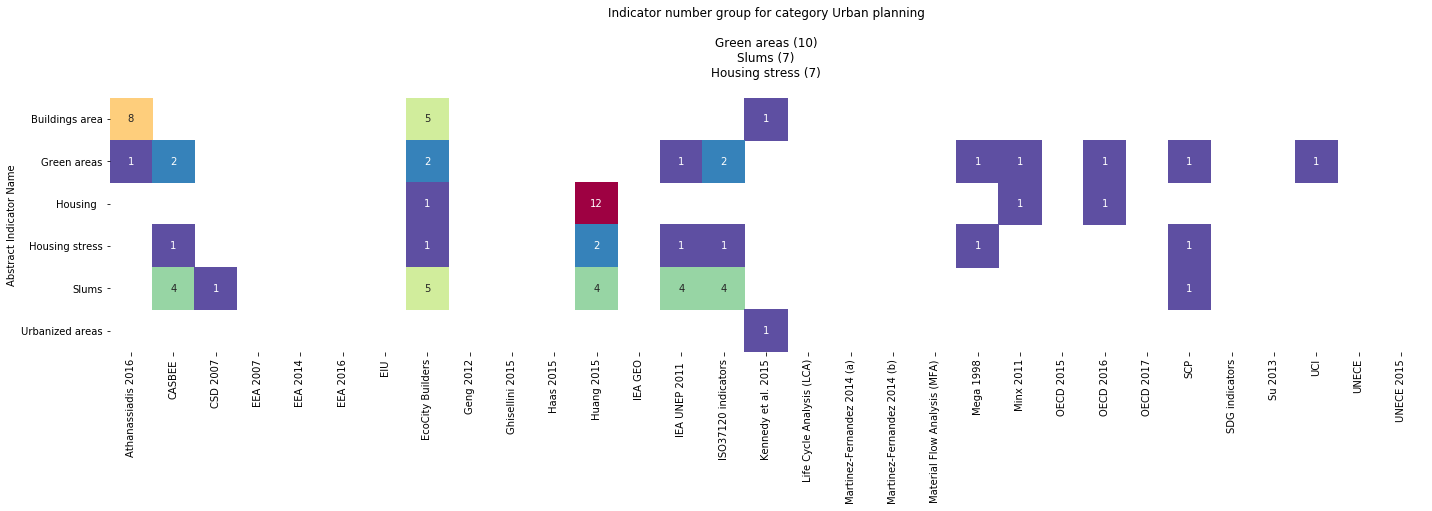

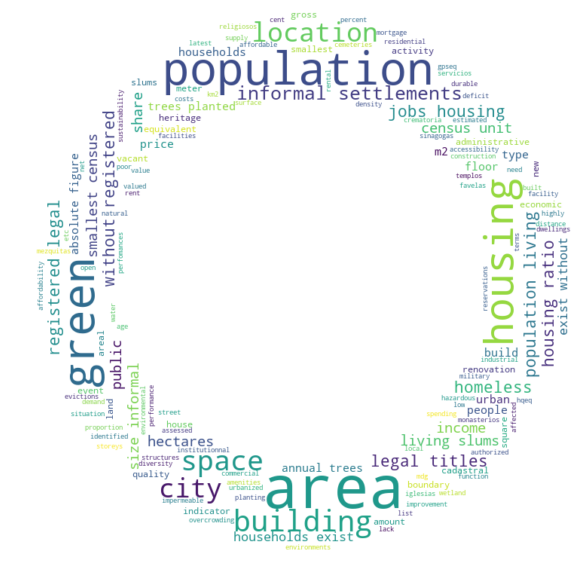

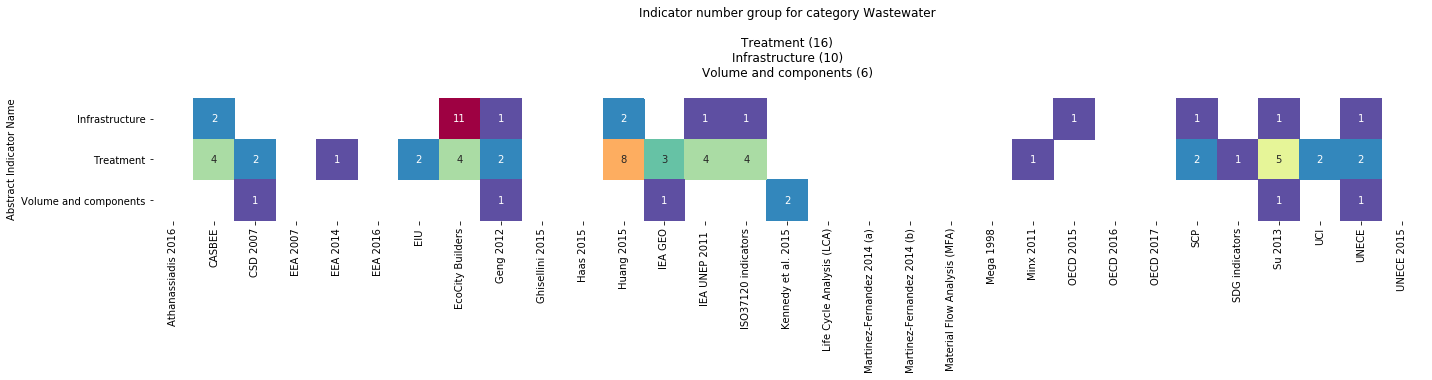

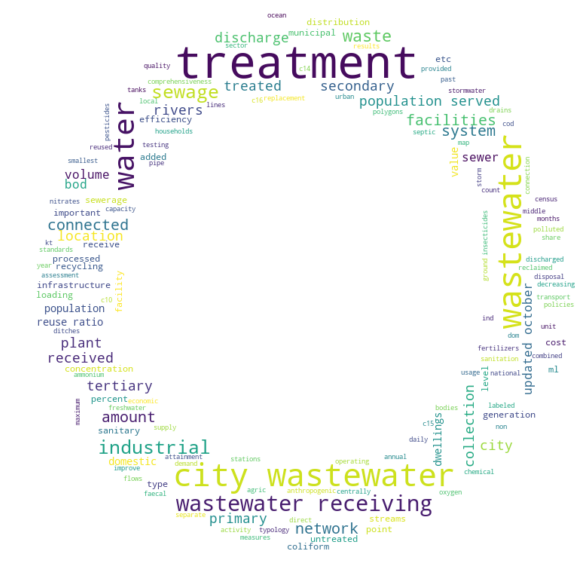

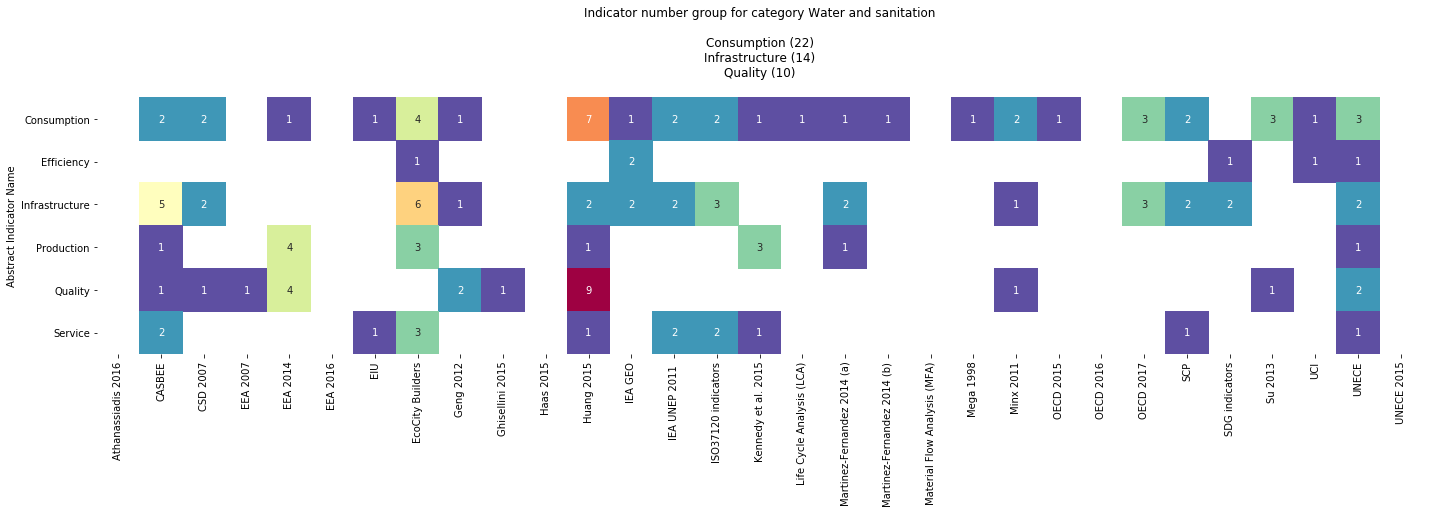

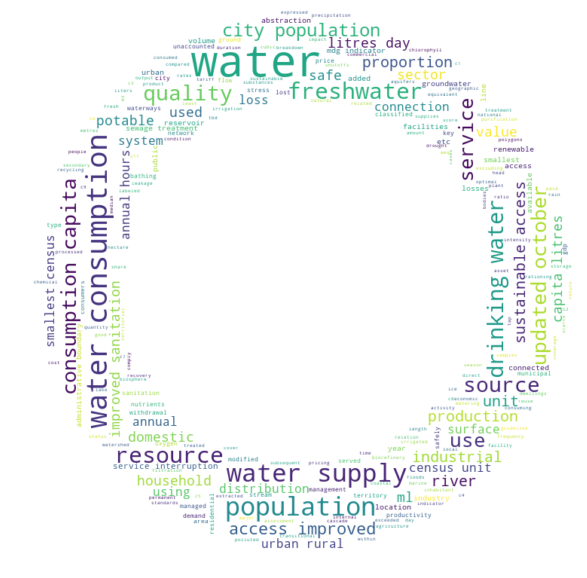

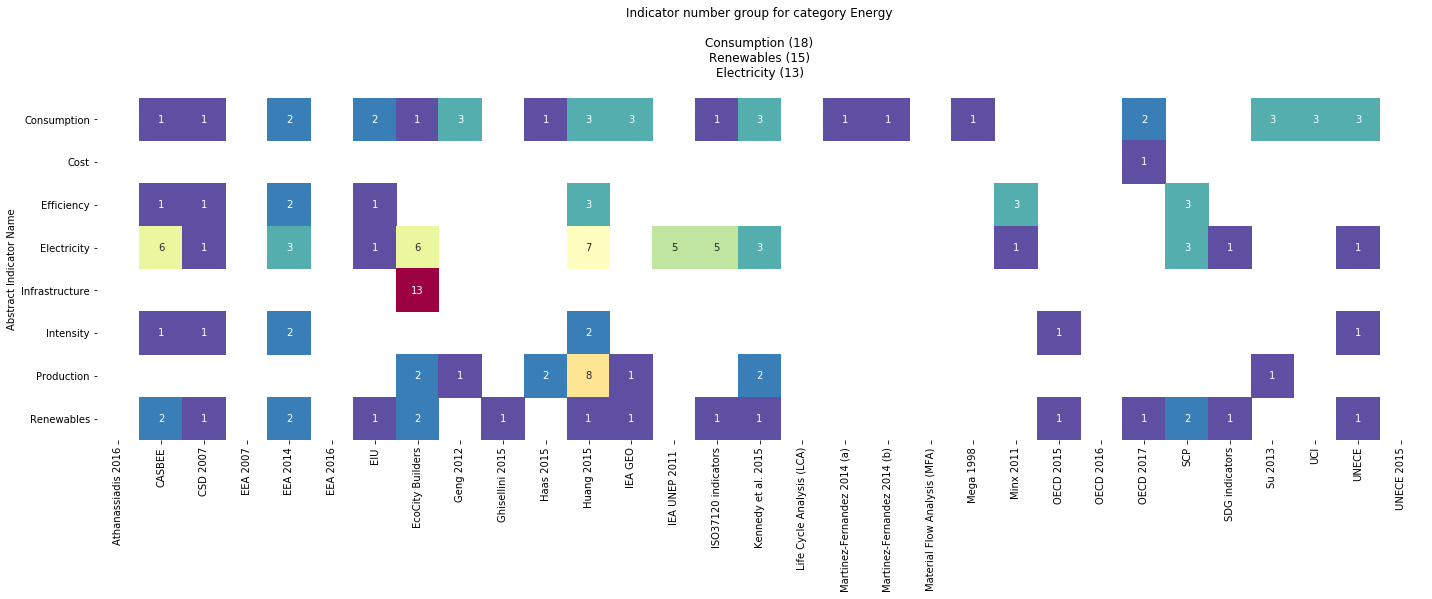

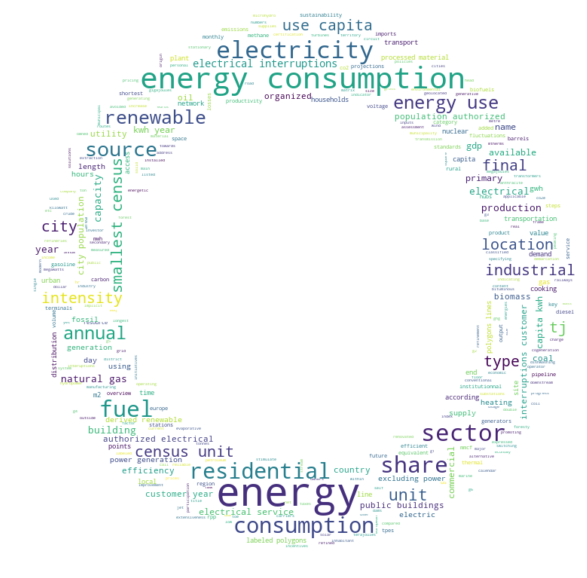

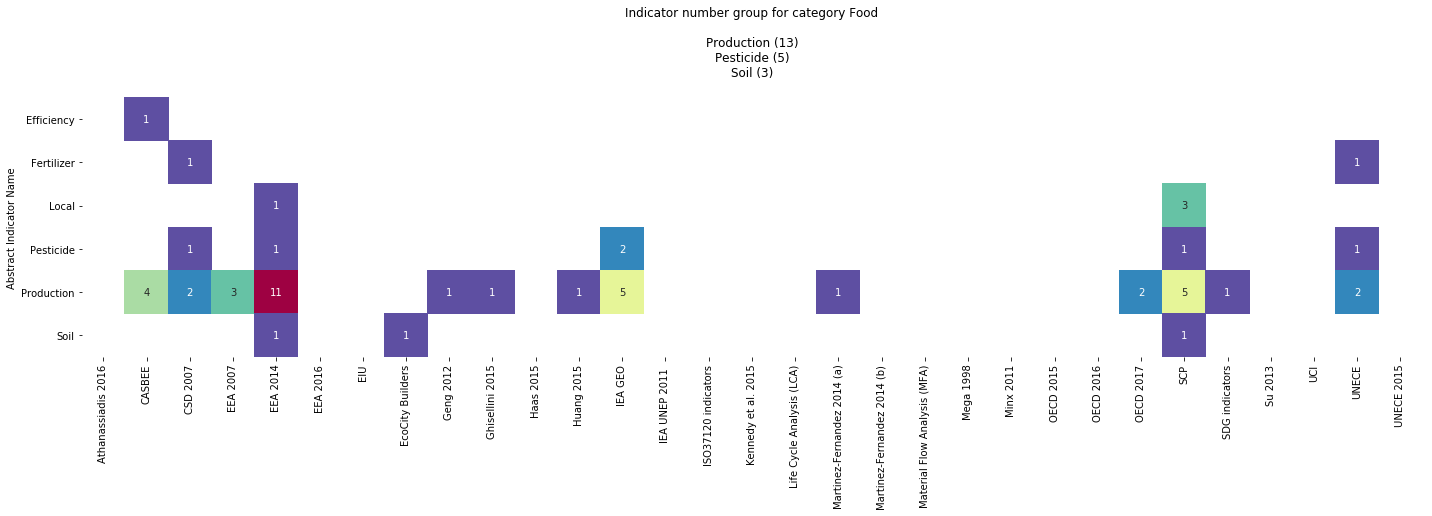

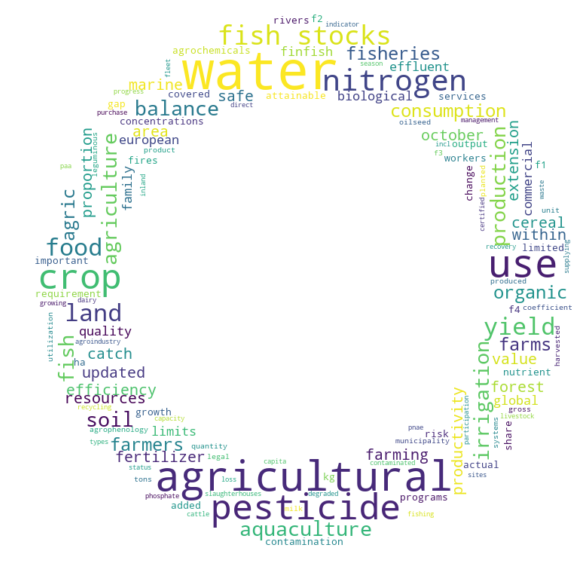

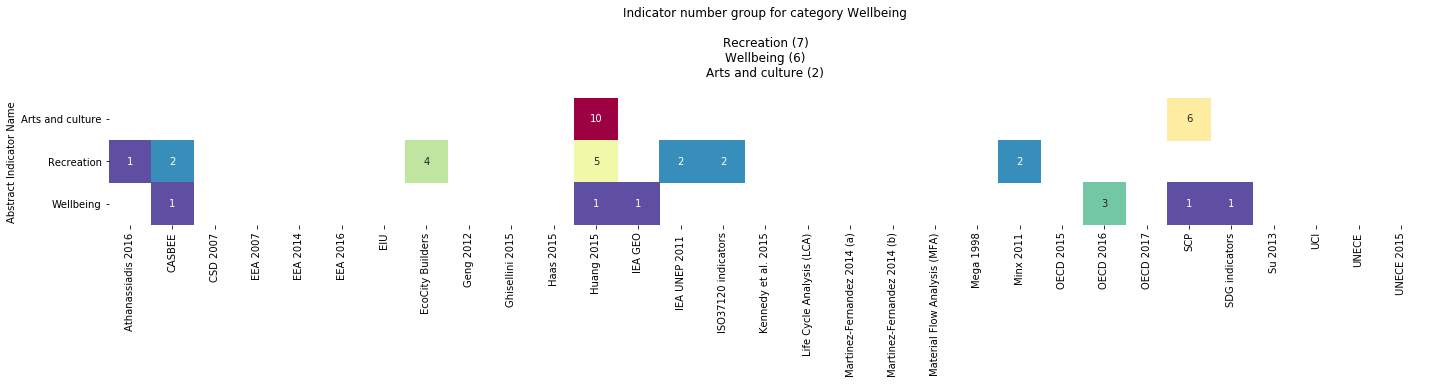

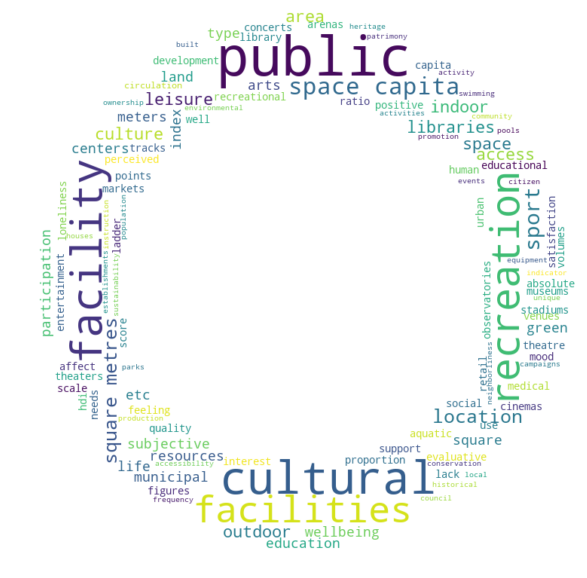

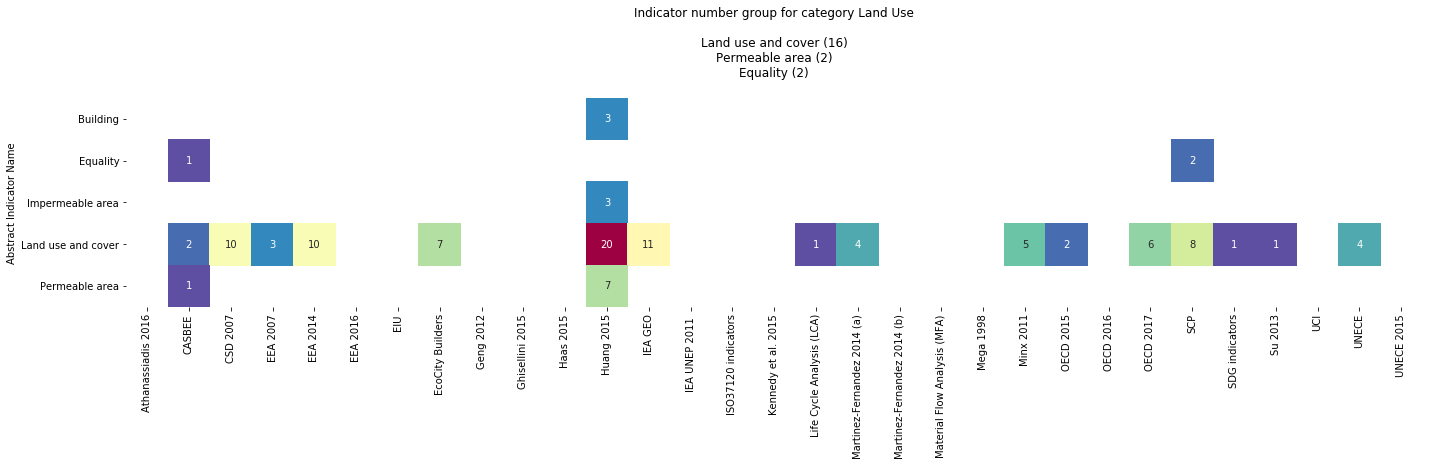

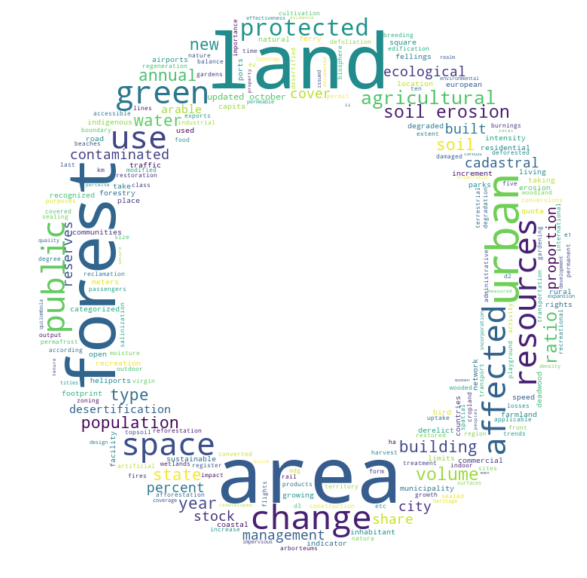

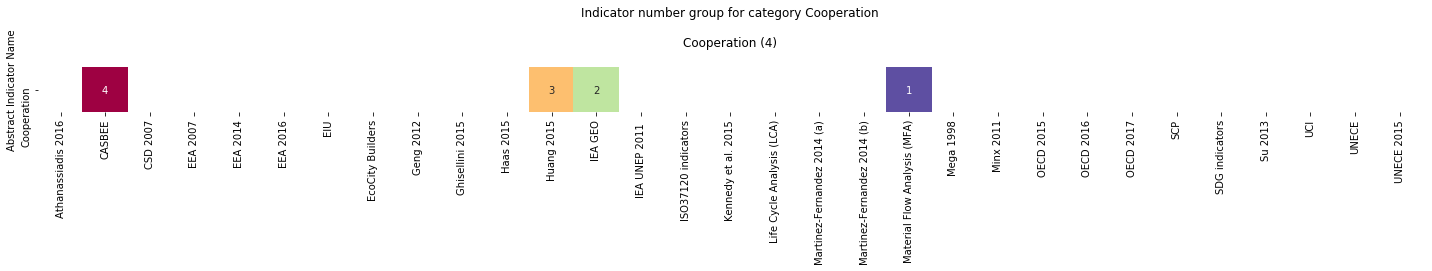

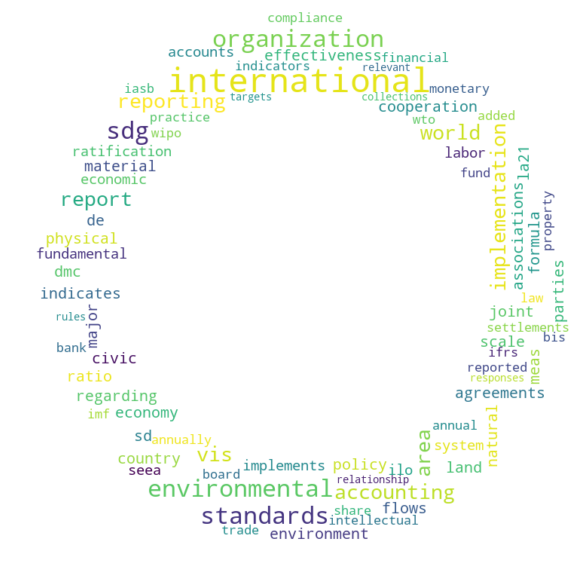

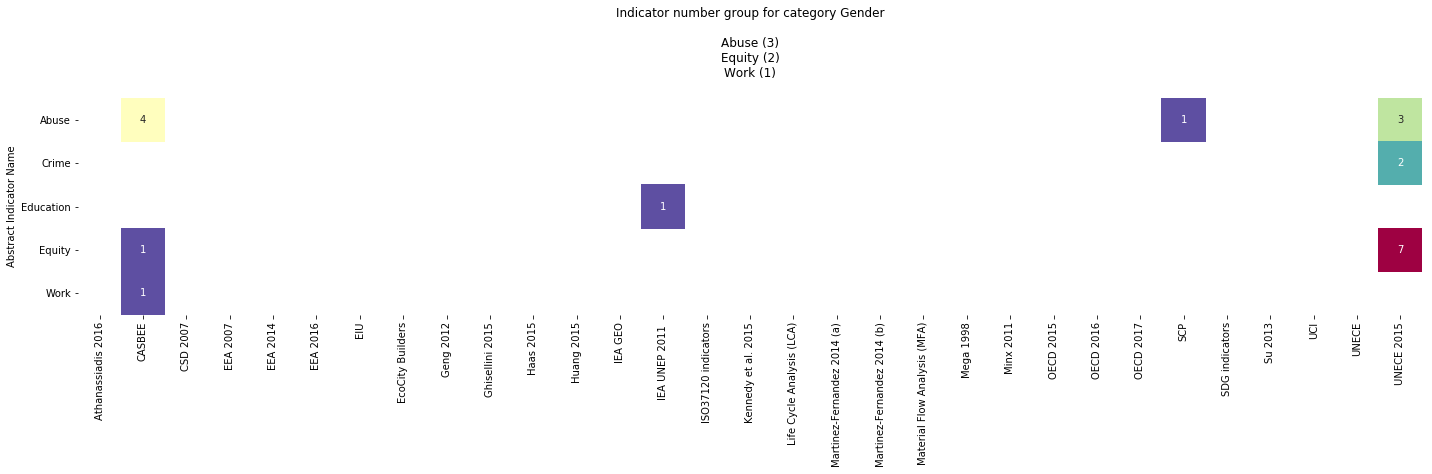

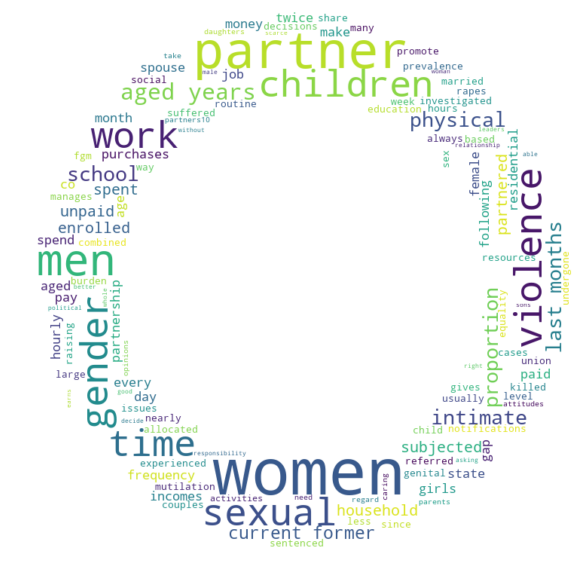

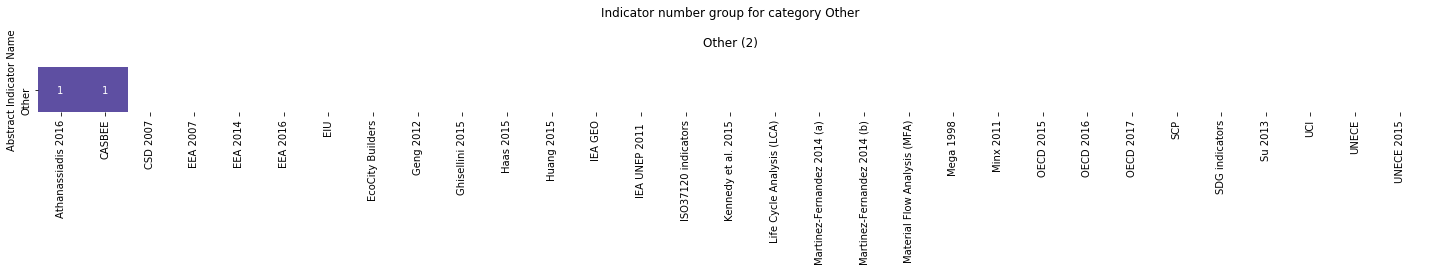

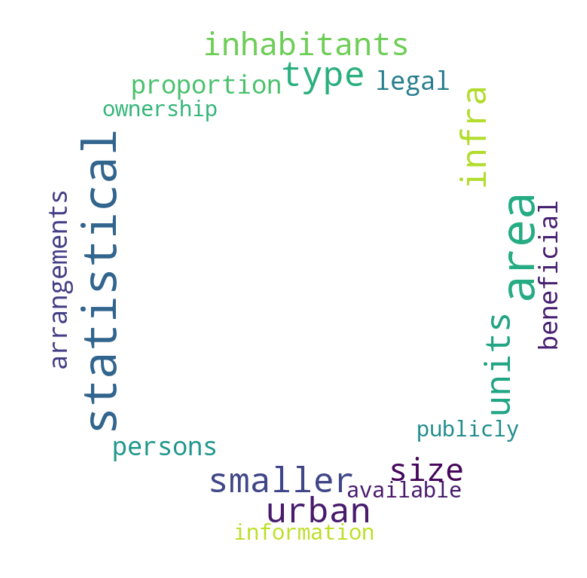

In [12]:
for cat in dataframe_trim_bin.loc[:, 'Category'].unique():
    # heatmap
    group_dataframe = dataframe_trim_bin.loc[dataframe_trim_bin.Category == cat]
    sub_group_dataframe = group_dataframe.groupby(['Abstract Indicator Name']).sum()
    h = 1 * sub_group_dataframe.shape[0]
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(sub_group_dataframe, annot=True, ax=ax,
                cmap='Spectral_r', cbar=False, square=True)
    sub_group_dataframe[sub_group_dataframe >= 1] = 1
    a = sub_group_dataframe.sum(axis=1).sort_values(ascending=False)[0:4]
    b = "\n".join(["{} ({})".format(a.index[e], int(i)) for e, i in enumerate(a)][0:3])
    ax.set_title("Indicator number group for category {}\n\n{}\n".format(cat, b))
    fig.tight_layout()
    plt.savefig("heatmap_cat_{}.png".format(cat), dpi=300)
    
    # tag cloud
    cloud_df = dataframe_trim.loc[dataframe_trim.Category == cat]
    cloud_df = cloud_df.loc[:, [i for i in cloud_df.columns if i not in ['Abstract Indicator Name', 'Category']]]
    text = ' '.join([i.strip().lower() for i in cloud_df.stack().tolist() if len(i) >= 2])
    # generate word cloud
    wc.generate(text)
    # store to file
    wc.to_file(path.join(d, "tagcloud_{}.png".format(cat)))
    # show
    plt.subplots(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

    #break

In [13]:
for col in dataframe_map_cat.columns:
    print("{}".format(col))
    sub = dataframe_map_cat.loc[:, col].sort_values()[0:3]
    for i in sub.index:
        print("{} ({})".format(i, int(sub.loc[i])))
    print('\n')

Athanassiadis 2016
Education (1)
Other (1)
Wellbeing (1)


CASBEE
Other (1)
Wellbeing (3)
People (3)


CSD 2007
Urban planning (1)
Governance (2)
Materials (2)


EEA 2007
Economy (1)
Water and sanitation (1)
Governance (2)


EEA 2014
Wastewater (1)
Health (3)
People (3)


EEA 2016
Economy (1)
Environment (1)
Solid waste (7)


EIU
Solid waste (2)
Wastewater (2)
Water and sanitation (2)


EcoCity Builders
Food (1)
Telecommunication (3)
Finance (3)


Geng 2012
Food (1)
Environment (2)
Energy (4)


Ghisellini 2015
Energy (1)
Food (1)
Water and sanitation (1)


Haas 2015
Finance (1)
Solid waste (1)
Economy (3)


Huang 2015
Finance (1)
Food (1)
Cooperation (3)


IEA GEO
Geography and climate (1)
Transportation (1)
Wellbeing (1)


IEA UNEP 2011 
Gender (1)
Environment (2)
Finance (2)


ISO37120 indicators
Wellbeing (2)
Telecommunication (3)
Finance (4)


Kennedy et al. 2015
Economy (1)
People (1)
Solid waste (2)


Life Cycle Analysis (LCA)
Geography and climate (1)
Land Use (1)
Water and sani